mean reward: -64.43735, max reward: 160.0, min reward:-99.5, std: 29.845071619573975


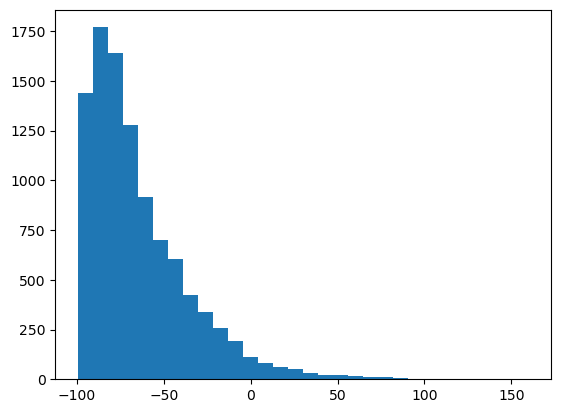

In [5]:
# average reward over 1000episodes
from env1_0 import Env1_0
from scipy.stats import poisson
import random
import pandas as pd
import numpy as np
import pickle

def avgperformance(env, num_episodes,optim_method,lambda_val,test_policy):

    if optim_method == 0:
        wd = './value iter results'
        method_str = 'valiter'
    elif optim_method == 1:
        wd = './td results'
        method_str = f'sarsa(lambda{lambda_val})'
    elif optim_method == 2:
        wd = './td results'
        method_str = f'Qlearning(lambda{lambda_val})'
    elif optim_method == 3:
        wd = './td results'
        method_str = 'sarsa_n'
    elif optim_method == 4:
        wd = './td results'
        method_str = 'sarsa_n'

    with open(f"{wd}/policy_{env.envID}_par{env.parset}_{method_str}.pkl", "rb") as file:
        policy = pickle.load(file)
    with open(f"{wd}/Q_{env.envID}_par{env.parset}_{method_str}.pkl", "rb") as file:
        Q = pickle.load(file)

    if test_policy == 1:
        with open(f"./test_policy{test_policy}.pkl", "rb") as file:
            policy = pickle.load(file)
        print('test policy used')

    rewards_receptacle = []
    for i in range(num_episodes):
        rewards = 0
        env.reset([-1,-1,-1,-1,-1,-1])
        done = False
        i=0
        while done == False:
            stateid = env._flatten(env.state)
            if test_policy == 2: # only 0
                reward, done, s = env.step(0)
            elif test_policy == 3: # only max
                if env.state[5] == 0:
                    reward, done, s = env.step(len(env.actions['a'])-1)
                else:
                    reward, done, s = env.step(env.state[2])
            elif test_policy == 4: # 0 when NW < 5, 2nd largest when NW = 5
                if env.state[5] == 0 and env.state[0] < 6:
                    reward, done, s = env.step(len(env.actions['a'])-1)
                elif env.state[5] == 1:
                    reward, done, s = env.step(env.state[2])
                elif env.state[5] == 0 and env.state[0] == 6:
                    reward, done, s = env.step(0)
            else: # follow one of the optimal policy derived by the algorithm
                reward, done, s = env.step(int(policy[stateid]))

            rewards += reward
          
            i+=1
        rewards_receptacle.append(rewards)
    return rewards_receptacle

env = Env1_0([-1,-1,-1,-1,-1,-1],2,1)
method = 2 # 0= val iter 1= sarsa l 2= qlearning l 3= sarsa_n 4= qlearning_n
#avgperformance(env, num_episodes,optim_method,lambda_val,test_policy):
rewards_receptacle = avgperformance(env,10000,method,0.7,3)
stat = (np.mean(rewards_receptacle), max(rewards_receptacle), min(rewards_receptacle), np.std(rewards_receptacle))
print(f'mean reward: {np.mean(rewards_receptacle)}, max reward: {max(rewards_receptacle)}, min reward:{min(rewards_receptacle)}, std: {np.std(rewards_receptacle)}')
# plot histogram of rewawrds receptacle
import matplotlib.pyplot as plt
plt.hist(rewards_receptacle, bins=30)
plt.show()



In [2]:
# check that the sampling follows the expected transition probability
from env1_0 import Env1_0
from scipy.stats import poisson
import random
import pandas as pd
import numpy as np
import pickle
env = Env1_0([-1,-1,-1,-1,-1,-1],2,1)
reachables = env.reachable_state_actions()
with open(f"transition_prob{env.envID}.pkl", "rb") as file:
    transition_prob = pickle.load(file)
samplenum = 100000
#for sa in reachables:
#s = sa[0]
#a = sa[1]
a = 0
#state = env._unflatten(s)
state = [4, 4, 0, 5, 3, 0]
samples = []
for i in range(samplenum):
    env.reset(state)
    reward, done, survival = env.step(a)
    outstate = env._flatten(env.state)
    samples.append(outstate)       
unique, counts = np.unique(samples, return_counts=True, axis=0)
prob = counts/samplenum


print([env._unflatten(i) for  i in unique])
print(prob)
print([env._unflatten(sa[0]) for sa in transition_prob[env._flatten(state)][a]])
eprob = [sa[1] for sa in transition_prob[env._flatten(state)][a]]
print(eprob)

[[5, 3, 0, 3, 0, 1], [5, 3, 0, 4, 0, 1], [5, 3, 0, 5, 0, 1], [5, 3, 0, 6, 0, 1], [6, 3, 0, 4, 0, 1], [6, 3, 0, 5, 0, 1], [6, 3, 0, 6, 0, 1]]
[0.0013  0.13298 0.36229 0.04846 0.0365  0.32514 0.09333]
[[5, 3, 0, 3, 0, 1], [5, 3, 0, 4, 0, 1], [5, 3, 0, 5, 0, 1], [5, 3, 0, 6, 0, 1], [6, 3, 0, 3, 0, 1], [6, 3, 0, 4, 0, 1], [6, 3, 0, 5, 0, 1], [6, 3, 0, 6, 0, 1]]
[0.0007966, 0.09695759999999999, 0.3922117, 0.0790341, 0.0006034, 0.07344239999999999, 0.2970883, 0.0598659]


In [7]:
# check if all individual state variable transition probabilities are correct.
import pickle
from value_iteration import value_iteration
from env1_0 import Env1_0
from scipy.stats import poisson, norm,binom
import random
import pandas as pd
import numpy as np

env = Env1_0([-1,-1,-1,-1,-1,-1],2,1)
v = value_iteration([-1, -1, -1, -1, -1, -1],2,1)

# test 1
# spring flow (q)
#print(v._qprobcalc())
#state = [4, 4, 0, 5, 3, 1]
#samplenum = 100000
#samples = []
#for i in range(samplenum):
#    env.reset(state)
#    reward, done, survival = env.step(a)
#    samples.append(env.state[4])
#
#unique, counts = np.unique(samples, return_counts=True, axis=0)
#prob = counts/samplenum
#prob



# test 2 
# NW tau=0
#state = [4, 0, 0, 0, 1, 0]
#a=4
#samplenum = 10000
#samples = []
#for i in range(samplenum):
#    env.reset(state)
#    reward, done, survival = env.step(a)
#    samples.append(env.state[0])
#
#unique, counts = np.unique(samples, return_counts=True, axis=0)
#prob = counts/samplenum
#print(unique)
#prob


# test 3 
# NW tau=1
#state = [2,0,4,0,0,1]
#a=4
#samplenum = 10000
#samples = []
#for i in range(samplenum):
#    env.reset(state)
#    reward, done, survival = env.step(a)
#    samples.append(env.state[0])
#unique, counts = np.unique(samples, return_counts=True, axis=0)
#prob = counts/samplenum
#print(unique)
#print(prob)



# test 4
# H tau = 0
state = [5,0,4,4,0,1]
samplenum = 10000
samples = []
a = 4
for i in range(samplenum):
    env.reset(state)
    reward, done, survival = env.step(a)
    samples.append(env.state[4])
unique, counts = np.unique(samples, return_counts=True, axis=0)
prob = counts/samplenum
print(unique)
print(prob)



[0 1 2 3 4]
[0.1477 0.241  0.2151 0.2486 0.1476]


In [1]:
# try _NWprobcalc
# check if all individual state variable transition probabilities are correct.
import pickle
from value_iteration import value_iteration
from env1_0 import Env1_0
from scipy.stats import poisson, norm,binom
import random
import pandas as pd
import numpy as np
import time

v = value_iteration([-1, -1, -1, -1, -1, -1],2,1)
# v.states['H']
# time each line
start_time = time.time()
v._NWprobcalc0()
print(f"_NWprobcalc0 took {time.time() - start_time} seconds")

start_time = time.time()
v._NWprobcalc1()
print(f"_NWprobcalc1 took {time.time() - start_time} seconds")

start_time = time.time()
v._Hprobcalc1()
print(f"_Hprobcalc1 took {time.time() - start_time} seconds")

start_time = time.time()
v._Hprobcalc0()
print(f"_Hprobcalc0 took {time.time() - start_time} seconds")

_NWprobcalc0 took 12.967659950256348 seconds
_NWprobcalc1 took 2.1167044639587402 seconds
_Hprobcalc1 took 1.4668402671813965 seconds
_Hprobcalc0 took 2.0390560626983643 seconds


In [1]:
# make a policy that is a derivative of the optimal policy from value iteration.

# first, make a policy where the agent always choose the highest production option
#  in the spring equal or above H of 0.76 (4th state)
# and equal or above NW of 8048 (3rd state)
# Also choose 2nd highest stocking option in the fall for states where H is greater or equal to 4th state
# and where NW is greater or equal of 5th state.

from env1_0 import Env1_0
from scipy.stats import poisson
import random
import pandas as pd
import numpy as np
import pickle
env = Env1_0([-1,-1,-1,-1,-1,-1],2)

with open(f"value iter results/policy_Env1.0_par1_valiter.pkl", "rb") as file:
    policy = pickle.load(file)
newpolicy = policy.copy()
sprinnw = 2
springH = 4
fallnw = 4
fallH = 3
for i in np.arange(sprinnw,len(env.states['NW'])):
    for j in np.arange(springH,len(env.states['H'])):
        for k in range(len(env.states['NH'])):
            for l in range(len(env.states['q'])):
                state = env._flatten([i,i,k,j,l,0])
                newpolicy[state] = 9
for i in np.arange(fallnw,len(env.states['NW'])):
    for j in np.arange(fallH,len(env.states['H'])):
        for k in range(len(env.states['NH'])):
            for l in range(len(env.states['q'])):
                state = env._flatten([i,i,k,j,l,0])
                newpolicy[state] = 9

with open(f"test_policy1.pkl", "wb") as file:
    pickle.dump(newpolicy, file)

TypeError: Env1_0.__init__() missing 1 required positional argument: 'discretization_set'